I chose to predict the variable Preferred Positions because I played a lot of FIFA in my younger days and I think I have the right knowledge about the stats to preform a good prediction.

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("CompleteDataset.csv")

df.head()

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/3006963432.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CompleteDataset.csv")


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

I chose these variables because each of these variables are distinctive for each position. 

In [4]:
df1 = df[['Ball control', 'Dribbling', 'Finishing','GK diving', 'Interceptions','Marking', 'Short passing','Preferred Positions', 'Sliding tackle', 'Sprint speed']]

df1.head()

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
0,93,91,94,7,29,22,83,ST LW,23,91
1,95,97,95,6,22,13,88,RW,26,87
2,95,96,89,9,36,21,81,LW,33,90
3,91,86,94,27,41,30,83,ST,38,77
4,48,30,13,91,30,10,55,GK,11,61


In [5]:
df1.sample(5)

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
15647,38,27,19,15,51,58,42,CB,55,54
16703,45,58,24,12,49,59,31,LB,58,75
12726,50,34,25,13,55,69,40,CB,68,42
11731,65,62,58,10,54,55,62,CM CAM,54,53
9743,63,60,28,14,67,68,53,RB,68,73


### Data Cleaning

I am now going to clean the data columns that I chose to use in the machine learning model later in the notebook.

In [6]:
df1[['Ball control']].dtypes

Ball control    object
dtype: object

There are values in the database that look like this: 83+2. But we want clean numbers, so we want to turn 83+2 into 83

In [7]:
type(df1.iloc[302,:][0])

str

The data type of the column is string

In [8]:
df1['Ball control'] = df1['Ball control'].str.slice_replace(2, 5, '')

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/1041548621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ball control'] = df1['Ball control'].str.slice_replace(2, 5, '')


In [9]:
df1.loc[[302]]

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
302,83,84+1,74,8,26,16,79+2,RM RW,17,80


Ball control has been changed into 83 from 83+2. Now let's do this for the remaining columns as well

In [10]:
df1['GK diving'] = df1['GK diving'].str.slice_replace(2, 5, '')
df1['Dribbling'] = df1['Dribbling'].str.slice_replace(2, 5, '')
df1['Finishing'] = df1['Finishing'].str.slice_replace(2, 5, '')
df1['Interceptions'] = df1['Interceptions'].str.slice_replace(2, 5, '')
df1['Marking'] = df1['Marking'].str.slice_replace(2, 5, '')
df1['Short passing'] = df1['Short passing'].str.slice_replace(2, 5, '')
df1['Sliding tackle'] = df1['Sliding tackle'].str.slice_replace(2, 5, '')
df1['Sprint speed'] = df1['Sprint speed'].str.slice_replace(2, 5, '')

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/4019354279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GK diving'] = df1['GK diving'].str.slice_replace(2, 5, '')
/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/4019354279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dribbling'] = df1['Dribbling'].str.slice_replace(2, 5, '')
/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/4019354279.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [11]:
df1.loc[[302]]

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
302,83,84,74,8,26,16,79,RM RW,17,80


In [12]:
df1.sample(20)

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
5410,75,75,60,12,35,17,67,RM RW LM,35,78
6172,70,69,62,13,25,39,72,LM CAM,51,70
839,49,46,50,10,79,84,70,CB,78,34
3052,75,79,65,11,60,58,63,RM LM,59,88
2617,75,73,67,15,62,57,73,LM RM,62,75
851,78,72,40,15,77,71,75,RB,75,77
988,19,19,11,76,20,14,24,GK,13,34
8346,68,71,61,14,23,18,64,RM LM,15,82
10191,33,12,11,69,12,16,45,GK,19,57
15495,59,63,55,9,22,22,53,RW RM,23,80


The issue seems to be fixed. We can now convert the columns from strings to a numeric type, and should get no errors

In [13]:
df1['Ball control'] = pd.to_numeric(df1['Ball control'])
df1['Dribbling'] = pd.to_numeric(df1['Dribbling'])
df1['Finishing'] = pd.to_numeric(df1['Finishing'])
df1['GK diving'] = pd.to_numeric(df1['GK diving'])
df1['Interceptions'] = pd.to_numeric(df1['Interceptions'])
df1['Marking'] = pd.to_numeric(df1['Marking'])
df1['Short passing'] = pd.to_numeric(df1['Short passing'])
df1['Sliding tackle'] = pd.to_numeric(df1['Sliding tackle'])
df1['Sprint speed'] = pd.to_numeric(df1['Sprint speed'])

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/3740642877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ball control'] = pd.to_numeric(df1['Ball control'])
/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/3740642877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dribbling'] = pd.to_numeric(df1['Dribbling'])
/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/3740642877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

### Preferred Positions

some players have more than one Preferred Positions. We want to cut those down to just one preferred position, because having all the combinations increases the number of target variables and makes it harder to predict. We are taking the first preferred position of each player and make that the target variable fot them.

In [14]:
df1.iloc[12976,:][7]

'RW CAM LM LW '

If we start at index 3 we always get the first full preferred position, since a position is always max 3 letters OR 2 letters + a blank space. We remove the blank spaces later

In [15]:
df1['Preferred Positions'] = df1['Preferred Positions'].str.slice_replace(3, 30, '')

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/698358557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Preferred Positions'] = df1['Preferred Positions'].str.slice_replace(3, 30, '')


In [16]:
df1.iloc[12976,:][7]

'RW '

In [17]:
df1['Preferred Positions'] = df1['Preferred Positions'].str.strip()

/var/folders/tm/47n66wv12dq7xrw82r1h48_r0000gn/T/ipykernel_7349/2811517417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Preferred Positions'] = df1['Preferred Positions'].str.strip()


In [18]:
df1.iloc[12976,:][7]

'RW'

In [19]:
df1.sample(20)

,Ball control,Dribbling,Finishing,GK diving,Interceptions,Marking,Short passing,Preferred Positions,Sliding tackle,Sprint speed
9217,52,52,18,12,66,64,64,CB,66,82
3946,75,75,66,12,58,39,74,CAM,35,53
8453,21,12,16,66,16,13,29,GK,13,35
14886,55,58,24,8,55,57,60,RB,60,66
3197,62,37,17,14,74,75,55,CB,69,49
15705,17,11,18,59,23,17,20,GK,10,36
14872,62,60,28,14,54,58,60,LB,57,78
4829,9,8,6,71,11,8,15,GK,12,37
13803,62,52,45,6,46,45,63,CM,46,72
12644,22,13,12,62,16,12,24,GK,11,47


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ball control         17981 non-null  int64 
 1   Dribbling            17981 non-null  int64 
 2   Finishing            17981 non-null  int64 
 3   GK diving            17981 non-null  int64 
 4   Interceptions        17981 non-null  int64 
 5   Marking              17981 non-null  int64 
 6   Short passing        17981 non-null  int64 
 7   Preferred Positions  17981 non-null  object
 8   Sliding tackle       17981 non-null  int64 
 9   Sprint speed         17981 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.4+ MB


In [21]:
type(df1.iloc[302,:][0])

numpy.int64

is seems like we have no empty values in our dataset. But just to be sure we can use some code to remove all empty values in our dataset

In [22]:
df1 = df1.dropna()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ball control         17981 non-null  int64 
 1   Dribbling            17981 non-null  int64 
 2   Finishing            17981 non-null  int64 
 3   GK diving            17981 non-null  int64 
 4   Interceptions        17981 non-null  int64 
 5   Marking              17981 non-null  int64 
 6   Short passing        17981 non-null  int64 
 7   Preferred Positions  17981 non-null  object
 8   Sliding tackle       17981 non-null  int64 
 9   Sprint speed         17981 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.4+ MB


We cleaned up the model features. We can move on to the data exploration

## Data exploration

A graph that shows stats grouped by positions, so we can see that all goalkeepers have a high goalkeeping stat etc.

In [24]:
df1 = df1.rename({'Preferred Positions': 'PreferredPositions'}, axis='columns')

In [25]:
# source boxplot https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
df_long = pd.melt(df1, "PreferredPositions", var_name="skill_type", value_name="value")

In [26]:
df_long.head()

,PreferredPositions,skill_type,value
0,ST,Ball control,93
1,RW,Ball control,95
2,LW,Ball control,95
3,ST,Ball control,91
4,GK,Ball control,48


<AxesSubplot:xlabel='skill_type', ylabel='value'>

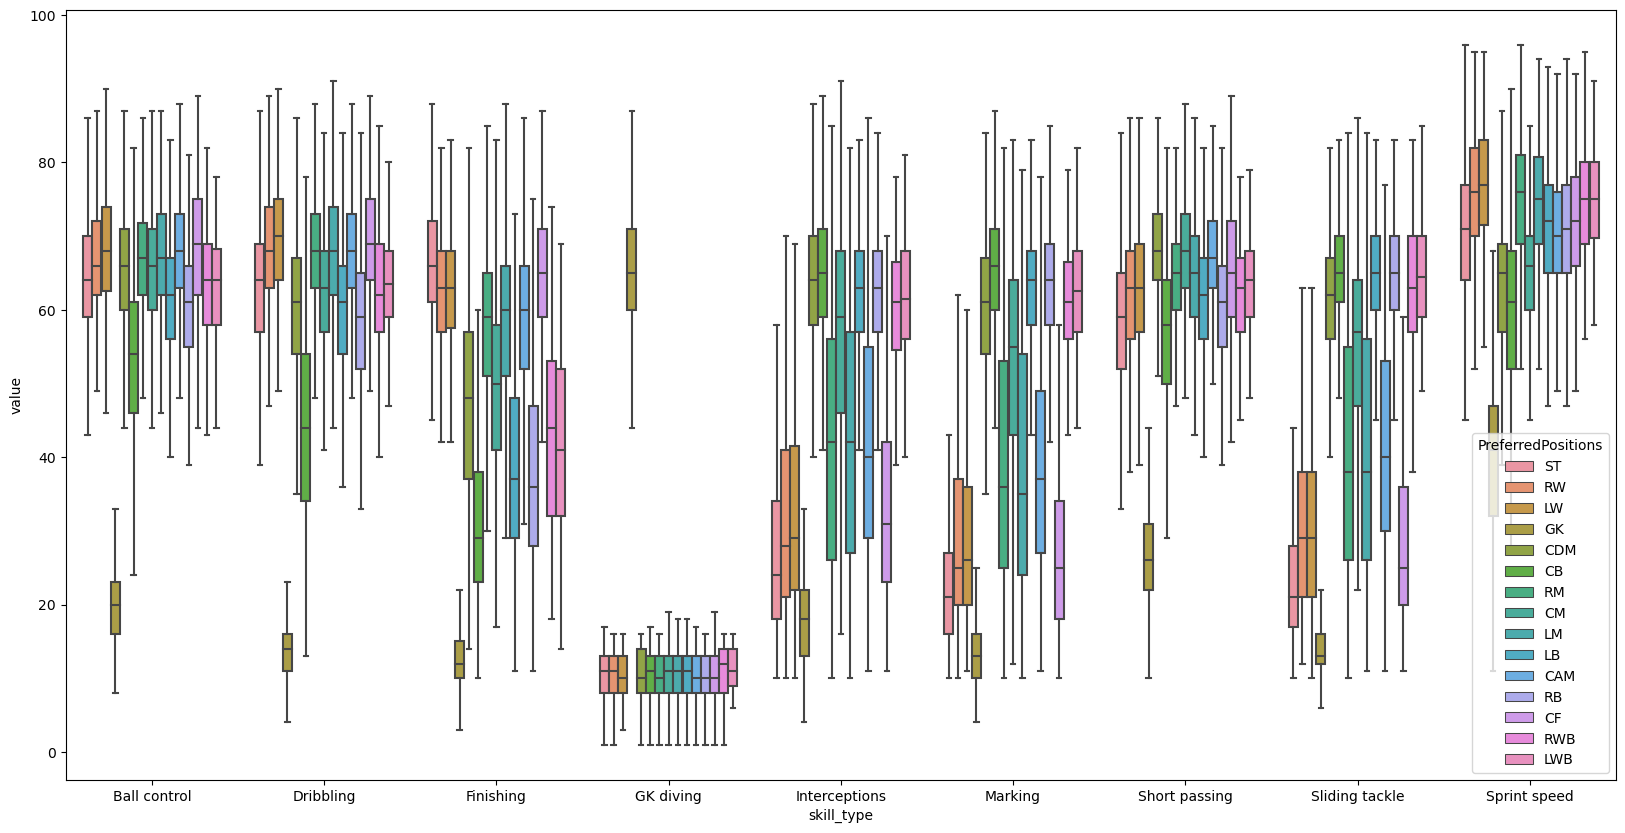

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x="skill_type", hue="PreferredPositions", y="value", data=df_long, showfliers=False)

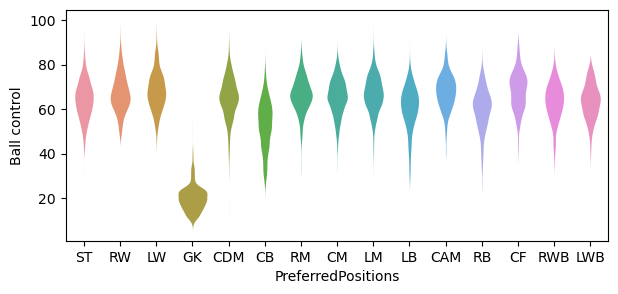

In [28]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Ball control", inner=None, linewidth=0)

plt.show()

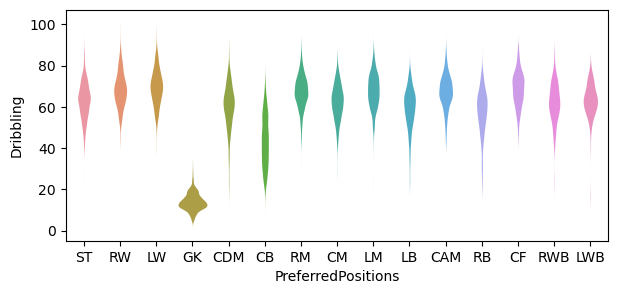

In [29]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Dribbling", inner=None, linewidth=0)
plt.show()

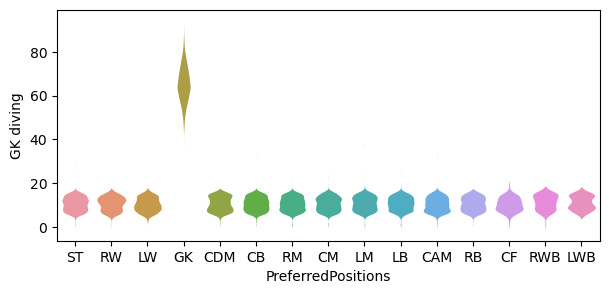

In [30]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="GK diving", inner=None, linewidth=0)
plt.show()

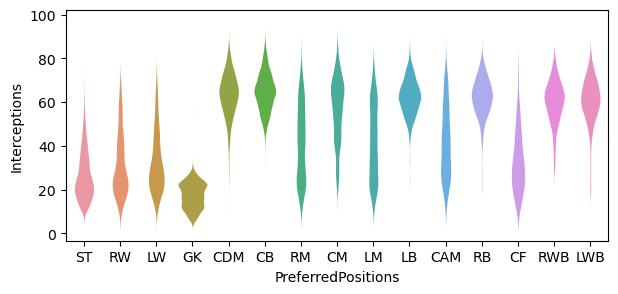

In [31]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Interceptions", inner=None, linewidth=0)
plt.show()

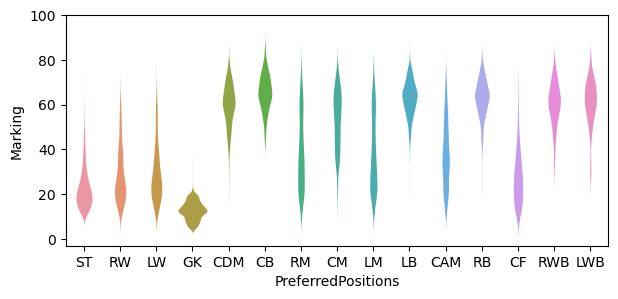

In [32]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Marking", inner=None, linewidth=0)
plt.show()

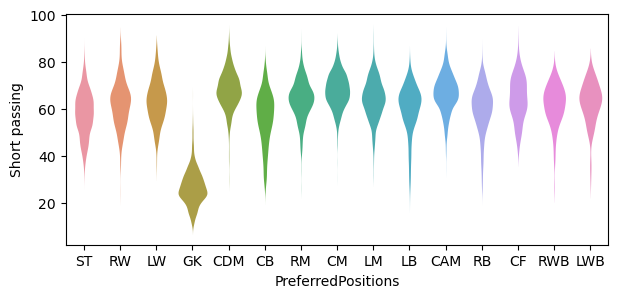

In [33]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Short passing", inner=None, linewidth=0)
plt.show()

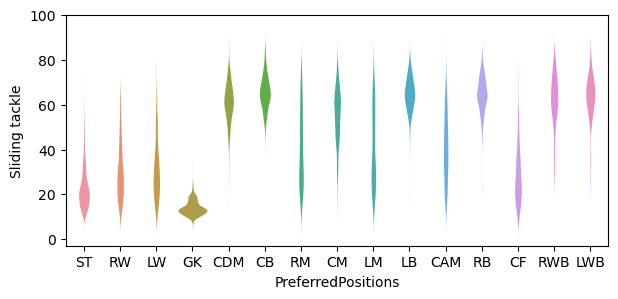

In [34]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Sliding tackle", inner=None, linewidth=0)
plt.show()

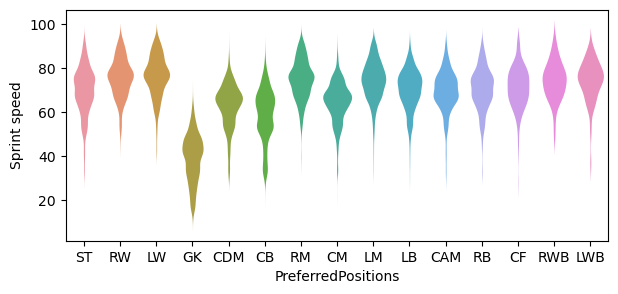

In [35]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Sprint speed", inner=None, linewidth=0)
plt.show()

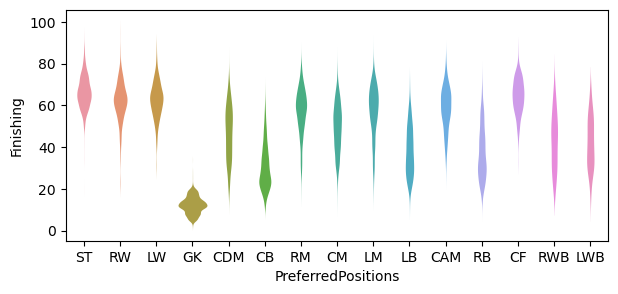

In [36]:
plt.figure(figsize=(7,3))
sns.violinplot(data=df1, x="PreferredPositions", y="Finishing", inner=None, linewidth=0)
plt.show()

As expected the boxplots and violin plot above show that different positions have different strenghts. For example defending players (CB, CDM, RB, LB) have on average lower numbers in areas that are beneficial for attacking player (dribbling, finishing, sprint speed). And attacking player (ST, RW, LW) have lower numbers in defending attributes (marking, sliding tackle, interceptions). This is good for the prediction model.